# Objetivo del archivo

realizaré descripción de datos, y lo que me parezca importante lo iré tirando a archivos de texto que luego iré a buscar.....

# Importación librerías y recursos externos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt
import datetime
from datetime import timedelta  
import timeboard as tb # turnos 

# para tratar de poner espanol
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
#locale = Locale('es', 'CL')
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')  

import os
import runpy
from pyexcel_ods import get_data
from matplotlib_venn import venn3
from matplotlib_venn import venn2, venn2_circles
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


#otro graficador
import seaborn as sns

#stats

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/home/egidio/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# importar funciones locales

In [2]:
#listo los archivos
scripts = []
for dirname, dirnames, filenames in os.walk('/home/egidio/Dropbox/Compucosas/programas py'):
    for filename in filenames:
        scripts.append(os.path.join(dirname, filename))

scripts

# los cargo
for script in scripts:
    if script[-3:] == '.py':
        exec(open(str(script)).read())


['/home/egidio/Dropbox/Compucosas/programas py/lector_ODF.py',
 '/home/egidio/Dropbox/Compucosas/programas py/como importar',
 '/home/egidio/Dropbox/Compucosas/programas py/descripcion_univariada.py',
 '/home/egidio/Dropbox/Compucosas/programas py/características_operativas_de_test.py',
 '/home/egidio/Dropbox/Compucosas/programas py/percentiles.py',
 '/home/egidio/Dropbox/Compucosas/programas py/tabala_frecuencias.py',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/percentiles.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/lector_ODF.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/descripcion_univariada.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/características_operativas_de_test.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/tabala_frecuencias.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/funciones_locales.cpython-36.pyc']

# importo BD 

In [3]:
sidra = pd.read_pickle('/home/egidio/Dropbox/Trabajos científicos/SIDRA/BD generadas/Current/sidra.pkl')
os.getcwd()
#sidra = pd.read_pickle('/home/egidio/Dropbox/Trabajos científicos/SIDRA/BD generadas/BD mar/sidra.pkl')

'/home/egidio/Dropbox/Trabajos científicos/SIDRA/Compiladores Jupyter/Analisis Red ssvq basal'

In [4]:
poblacion = pd.read_csv('/home/egidio/Dropbox/Trabajos científicos/SIDRA/BD generadas/Current/censo2017_poblacion.csv')

algunas generalidades de los que estoy importando

In [5]:
poblacion.head()

,FID,REGION,PROVINCIA,COMUNA,NOM_REGION,NOM_PROVIN,NOM_COMUNA,TOTAL_VIVI,PARTICULAR,COLECTIVAS,TOTAL_PERS,HOMBRES,MUJERES,DENSIDAD,INDICE_MAS,INDICE_DEP,IND_DEP_JU,IND_DEP_VE,Shape__Area,Shape__Length
0,45,5,51,5101,REGIÓN DE VALPARAÍSO,VALPARAÍSO,VALPARAÍSO,117196,116835,361,296655,144945,151710,935.3,95.5,45.2,25.8,19.4,4.520715e+08,167384.228819
1,46,5,51,5102,REGIÓN DE VALPARAÍSO,VALPARAÍSO,CASABLANCA,11606,11588,18,26867,13346,13521,28.1,98.7,47.5,29.6,17.9,1.370067e+09,243996.512223
2,47,5,51,5103,REGIÓN DE VALPARAÍSO,VALPARAÍSO,CONCÓN,20290,20266,24,42152,20321,21831,549.9,93.1,45.1,28.2,16.8,1.091926e+08,57332.818380
3,48,5,51,5104,REGIÓN DE VALPARAÍSO,VALPARAÍSO,JUAN FERNÁNDEZ,445,438,7,926,499,427,8.7,116.9,41.4,29.2,12.2,1.505324e+08,142974.467386
4,49,5,51,5105,REGIÓN DE VALPARAÍSO,VALPARAÍSO,PUCHUNCAVÍ,17451,17436,15,18546,9358,9188,61.7,101.9,52.2,30.3,21.9,4.259776e+08,123980.405925


In [6]:
sidra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926302 entries, U0002625295 to U0002724841
Data columns (total 48 columns):
Establecimiento               926301 non-null object
RutPaciente                   911598 non-null object
Edad                          926294 non-null float64
Sexo_x                        926301 non-null object
Comuna                        923211 non-null object
Provincia                     856986 non-null object
MotivoConsulta                926129 non-null object
Prevision                     917490 non-null object
Telefono                      851068 non-null object
Direccion                     926285 non-null object
Nombre                        767515 non-null object
Apellido Paterno              767515 non-null object
Apellido Materno              757837 non-null object
Fecha Nacimiento              767514 non-null object
Plan                          759024 non-null object
Condición de Urgencia         431975 non-null object
ClasificacionConsulta         

In [7]:
sidra.columns

Index(['Establecimiento', 'RutPaciente', 'Edad', 'Sexo_x', 'Comuna',
       'Provincia', 'MotivoConsulta', 'Prevision', 'Telefono', 'Direccion',
       'Nombre', 'Apellido Paterno', 'Apellido Materno', 'Fecha Nacimiento',
       'Plan', 'Condición de Urgencia', 'ClasificacionConsulta',
       'TipoAccidente', 'NumeroAtencionesAnteriores', 'DiagnosticoPrincipal',
       'OtrosDiagnosticos', 'LlegadaEn', 'ProcedenciaPaciente',
       'Origen_paciente', 'Arribo_paciente', 'LlegadaSAMU', 'Destino_paciente',
       'AtInterrumpidaPor', 'AtendidoPor', 'DestinoAlta', 'CondicionAlCierre',
       'Pronostico', 'Categorizacion', 'AtencionEnfermeria', 'Local',
       'TS_ingreso', 'TS_triage', 'TS_atencion', 'TS_cierremedico',
       'TS_egreso', 'DT_EsperaCategorizacion', 'DT_EsperaMD', 'DT_AtencionMD',
       'DT_definicionPAC', 'DT_Espera_CierreAdm', 'DT_Total', 'Triage',
       'Turno'],
      dtype='object')

# preparo BD para su posterior análisis

Preparo las condicionantes para dejar las BD por cada centro, intervalos de fechas y depurados los errores administrativos...

### por intervalo fecha

In [8]:
inicio = pd.to_datetime('2018-01-01')
fin    = pd.to_datetime('2018-12-31') 

### por error administrativo

In [9]:
sidra.loc[sidra.AtInterrumpidaPor == 'Error Administrativo'].groupby(
    ['Establecimiento']).Turno.count().sort_values()

Establecimiento
Hospital San Agustín (La Ligua)                                148
Hospital de Petorca                                            271
Hospital Dr Víctor Hugo Moll (Cabildo)                         275
Hospital Juana Ross de Edwards (Peñablanca, Villa Alemana)     306
Hospital Santo Tomás (Limache)                                 579
Hospital Dr Mario Sánchez Vergara (La Calera)                  822
Hospital Adriana Cousiño (Quintero)                           1008
Hospital San Martín (Quillota)                                1306
Hospital de Quilpué                                           1725
Hospital Dr Gustavo Fricke (Viña del Mar)                     6809
Name: Turno, dtype: int64

### Compilación de restricciones

con esta complicación, luego sólo separaré según establecimiento

In [10]:
BD = sidra.loc[(sidra.TS_ingreso < fin) &
                (sidra.TS_ingreso > inicio)      &
                (sidra.AtInterrumpidaPor != 'Error Administrativo')].copy()


### Por Establecimiento

In [11]:
sidra.Establecimiento.value_counts()
BD.Establecimiento.value_counts()

Hospital Dr Gustavo Fricke (Viña del Mar)                     303209
Hospital San Martín (Quillota)                                153953
Hospital de Quilpué                                           140192
Hospital Adriana Cousiño (Quintero)                            67451
Hospital Dr Mario Sánchez Vergara (La Calera)                  59701
Hospital Santo Tomás (Limache)                                 58236
Hospital San Agustín (La Ligua)                                52003
Hospital Juana Ross de Edwards (Peñablanca, Villa Alemana)     46123
Hospital Dr Víctor Hugo Moll (Cabildo)                         31357
Hospital de Petorca                                            14076
Name: Establecimiento, dtype: int64

Hospital Dr Gustavo Fricke (Viña del Mar)                     176603
Hospital San Martín (Quillota)                                 93241
Hospital de Quilpué                                            83357
Hospital Adriana Cousiño (Quintero)                            55908
Hospital Dr Mario Sánchez Vergara (La Calera)                  50889
Hospital Santo Tomás (Limache)                                 48302
Hospital San Agustín (La Ligua)                                45079
Hospital Juana Ross de Edwards (Peñablanca, Villa Alemana)     39700
Hospital Dr Víctor Hugo Moll (Cabildo)                         27419
Hospital de Petorca                                            12083
Name: Establecimiento, dtype: int64

Defino una pequeña submuestra de cada uno de los hospitales. Así luego los puedo llamar cuando realice análisis de cada uno de ellos.
Desestimo hacer submuestras separadas entre ellas, eso me impedirá hacer intercambio de pacientes o datos entre ellos.

In [12]:
HGF = BD.loc[BD.Establecimiento == 'Hospital Dr Gustavo Fricke (Viña del Mar)']
H_quillota = BD.loc[BD.Establecimiento == 'Hospital San Martín (Quillota)']
H_quilpue = BD.loc[BD.Establecimiento == 'Hospital de Quilpué']
H_quintero = BD.loc[BD.Establecimiento == 'Hospital Adriana Cousiño (Quintero)']
H_calera = BD.loc[BD.Establecimiento == 'Hospital Dr Mario Sánchez Vergara (La Calera)']
H_limache = BD.loc[BD.Establecimiento == 'Hospital Santo Tomás (Limache)']
H_ligua = BD.loc[BD.Establecimiento == 'Hospital San Agustín (La Ligua)']
H_penablanca = BD.loc[BD.Establecimiento == 'Hospital Juana Ross de Edwards (Peñablanca, Villa Alemana)']
H_cabildo = BD.loc[BD.Establecimiento == 'Hospital Dr Víctor Hugo Moll (Cabildo)']
H_petorca = BD.loc[BD.Establecimiento == 'Hospital de Petorca']

defino una variable para llamar a todas las submuestras.

In [13]:
hospitales = ['HGF', 'H_quillota', 'H_quilpue', 'H_quintero',
              'H_calera', 'H_limache', 'H_ligua', 'H_penablanca',
              'H_cabildo', 'H_petorca']
hospitales

['HGF',
 'H_quillota',
 'H_quilpue',
 'H_quintero',
 'H_calera',
 'H_limache',
 'H_ligua',
 'H_penablanca',
 'H_cabildo',
 'H_petorca']

### Población

desde una BD sacada del INE puedo tener la población de cada una de las comunas del territorio

In [14]:
poblacion.columns
poblacion[['NOM_COMUNA', 'TOTAL_VIVI' , 'TOTAL_PERS', 'Shape__Area']].head()

Index(['FID', 'REGION', 'PROVINCIA', 'COMUNA', 'NOM_REGION', 'NOM_PROVIN',
       'NOM_COMUNA', 'TOTAL_VIVI', 'PARTICULAR', 'COLECTIVAS', 'TOTAL_PERS',
       'HOMBRES', 'MUJERES', 'DENSIDAD', 'INDICE_MAS', 'INDICE_DEP',
       'IND_DEP_JU', 'IND_DEP_VE', 'Shape__Area', 'Shape__Length'],
      dtype='object')

,NOM_COMUNA,TOTAL_VIVI,TOTAL_PERS,Shape__Area
0,VALPARAÍSO,117196,296655,4.520715e+08
1,CASABLANCA,11606,26867,1.370067e+09
2,CONCÓN,20290,42152,1.091926e+08
3,JUAN FERNÁNDEZ,445,926,1.505324e+08
4,PUCHUNCAVÍ,17451,18546,4.259776e+08


## Caracterización de los hospitales y lo dejo en una BD accedible y en diccionario

esto me permite luego acceder a ellos sin problemas y poder llamarlo
Incluyo:
* Nombre en clave del hospital
* nombre en SIDRA
* Comunas que corresponde
* Nombre de verdad del hospital para luego llamarlo cuando lo requiera
* población asignada al hospital según comunas

In [15]:
BD.Establecimiento.unique()

array(['Hospital Santo Tomás (Limache)',
       'Hospital Juana Ross de Edwards (Peñablanca, Villa Alemana)',
       'Hospital San Martín (Quillota)',
       'Hospital Dr Víctor Hugo Moll (Cabildo)',
       'Hospital Adriana Cousiño (Quintero)',
       'Hospital Dr Gustavo Fricke (Viña del Mar)',
       'Hospital Dr Mario Sánchez Vergara (La Calera)',
       'Hospital San Agustín (La Ligua)', 'Hospital de Quilpué',
       'Hospital de Petorca'], dtype=object)

In [16]:
infohospitales = {}
infohospitales['HGF']=  dict(
    {'codigo hospital': 'HGF',
     'Comunas': ['VIÑA DEL MAR', 'CONCÓN'],
     'Nombre': 'Hospital de Viña',
     'Nombre Sidra':    'Hospital Dr Gustavo Fricke (Viña del Mar)',
     'Complejidad': 'Alta',
     'Poblacion': float(
         poblacion[poblacion.NOM_COMUNA == 'VIÑA DEL MAR']['TOTAL_PERS'].values + 
         poblacion[poblacion.NOM_COMUNA == 'CONCÓN']['TOTAL_PERS'].values)
                        })
infohospitales['H_quillota'] = dict(
    {'codigo hospital': 'H_quillota',
    'Comunas': ['QUILLOTA', 'LA CRUZ'],
     'Nombre': 'Hospital de Quillota',
          'Nombre Sidra':    'Hospital San Martín (Quillota)',
     'Complejidad': 'Alta',
    'Poblacion': float(
        poblacion[poblacion.NOM_COMUNA == 'QUILLOTA']['TOTAL_PERS'].values +
        poblacion[poblacion.NOM_COMUNA == 'LA CRUZ']['TOTAL_PERS'].values)
                        })
infohospitales['H_petorca'] = dict(
    {'codigo hospital': 'H_petorca',
    'Comunas': 'PETORCA',
     'Nombre': 'Hospital de Petorca',
          'Nombre Sidra':    'Hospital de Petorca',
     'Complejidad': 'Baja',
     'Poblacion': float(
        poblacion[poblacion.NOM_COMUNA == 'PETORCA']['TOTAL_PERS'].values)
                        })
infohospitales['H_cabildo'] = dict(
    {'codigo hospital': 'H_cabildo',
    'Comunas': 'CABILDO',
     'Nombre': 'Hospital de Cabildo',
          'Nombre Sidra':   'Hospital Dr Víctor Hugo Moll (Cabildo)',
     'Complejidad': 'Baja',
    'Poblacion': float(
        poblacion[poblacion.NOM_COMUNA == 'CABILDO']['TOTAL_PERS'].values)
                        })
infohospitales['H_quintero'] = dict(
    {'codigo hospital': 'H_quintero',
    'Comunas': ['PUCHUNCAVÍ', 'QUINTERO'],
     'Nombre': 'Hospital de Quintero',
          'Nombre Sidra':    'Hospital Adriana Cousiño (Quintero)',
     'Complejidad': 'Media',
    'Poblacion': float(
        poblacion[poblacion.NOM_COMUNA == 'PUCHUNCAVÍ']['TOTAL_PERS'].values + 
        poblacion[poblacion.NOM_COMUNA == 'QUINTERO']['TOTAL_PERS'].values)
                        })
infohospitales['H_ligua'] = dict(
    {'codigo hospital': 'H_ligua',
    'Comunas': ['LA LIGUA', 'PAPUDO',  'ZAPALLAR'],
     'Nombre': 'Hospital de La Ligua',
          'Nombre Sidra':   'Hospital San Agustín (La Ligua)' ,
     'Complejidad': 'Media',
    'Poblacion': float(
        poblacion[poblacion.NOM_COMUNA == 'LA LIGUA']['TOTAL_PERS'].values + 
        poblacion[poblacion.NOM_COMUNA == 'PAPUDO']['TOTAL_PERS'].values + 
        poblacion[poblacion.NOM_COMUNA == 'ZAPALLAR']['TOTAL_PERS'].values)
                        })
infohospitales['H_calera'] = dict(
    {'codigo hospital': 'H_calera',
    'Comunas': ['CALERA', 'NOGALES', 'HIJUELAS'],
     'Nombre': 'Hospital de Calera',
          'Nombre Sidra':   'Hospital Dr Mario Sánchez Vergara (La Calera)',
     'Complejidad': 'Baja',
    'Poblacion': float(
        poblacion[poblacion.NOM_COMUNA == 'CALERA']['TOTAL_PERS'].values + 
        poblacion[poblacion.NOM_COMUNA == 'NOGALES']['TOTAL_PERS'].values + 
        poblacion[poblacion.NOM_COMUNA == 'HIJUELAS']['TOTAL_PERS'].values)
                        })
infohospitales['H_quilpue'] = dict(
    {'codigo hospital': 'H_quilpue',
    'Comunas': 'QUILPUÉ',
     'Nombre': 'Hospital de Quilpué',
          'Nombre Sidra':   'Hospital de Quilpué' ,
     'Complejidad': 'Alta',
    'Poblacion': float(
        poblacion[poblacion.NOM_COMUNA == 'QUILPUÉ']['TOTAL_PERS'].values) 
        })
infohospitales['H_penablanca'] = dict(
    {'codigo hospital': 'H_penablanca',
    'Comunas': 'VILLA ALEMANA',
     'Nombre': 'Hospital de Villa Alemana',
          'Nombre Sidra':   'Hospital Juana Ross de Edwards (Peñablanca, Villa Alemana)' ,
     'Complejidad': 'Media',
    'Poblacion': float(
        poblacion[poblacion.NOM_COMUNA == 'VILLA ALEMANA']['TOTAL_PERS'].values) 
        })
infohospitales['H_limache'] = dict(
    {'codigo hospital': 'H_limache',
    'Comunas': [ 'LIMACHE', 'OLMUÉ'],
     'Nombre': 'Hospital de Limache',
          'Nombre Sidra':   'Hospital Santo Tomás (Limache)',
     'Complejidad': 'Media',
    'Poblacion': float(
        poblacion[poblacion.NOM_COMUNA == 'LIMACHE']['TOTAL_PERS'].values +
        poblacion[poblacion.NOM_COMUNA == 'OLMUÉ']['TOTAL_PERS'].values) 
        })


In [17]:
BD_infohosp = pd.DataFrame.from_dict(infohospitales).T
BD_infohosp
#BD_infohosp.sort_values('Poblacion')[['Nombre','Complejidad', 'Comunas']]

,Complejidad,Comunas,Nombre,Nombre Sidra,Poblacion,codigo hospital
HGF,Alta,"[VIÑA DEL MAR, CONCÓN]",Hospital de Viña,Hospital Dr Gustavo Fricke (Viña del Mar),376400,HGF
H_quillota,Alta,"[QUILLOTA, LA CRUZ]",Hospital de Quillota,Hospital San Martín (Quillota),112615,H_quillota
H_petorca,Baja,PETORCA,Hospital de Petorca,Hospital de Petorca,9826,H_petorca
H_cabildo,Baja,CABILDO,Hospital de Cabildo,Hospital Dr Víctor Hugo Moll (Cabildo),19388,H_cabildo
H_quintero,Media,"[PUCHUNCAVÍ, QUINTERO]",Hospital de Quintero,Hospital Adriana Cousiño (Quintero),50469,H_quintero
H_ligua,Media,"[LA LIGUA, PAPUDO, ZAPALLAR]",Hospital de La Ligua,Hospital San Agustín (La Ligua),49085,H_ligua
H_calera,Baja,"[CALERA, NOGALES, HIJUELAS]",Hospital de Calera,Hospital Dr Mario Sánchez Vergara (La Calera),90662,H_calera
H_quilpue,Alta,QUILPUÉ,Hospital de Quilpué,Hospital de Quilpué,151708,H_quilpue
H_penablanca,Media,VILLA ALEMANA,Hospital de Villa Alemana,"Hospital Juana Ross de Edwards (Peñablanca, Vi...",126548,H_penablanca
H_limache,Media,"[LIMACHE, OLMUÉ]",Hospital de Limache,Hospital Santo Tomás (Limache),63637,H_limache


In [18]:
HGF.columns

Index(['Establecimiento', 'RutPaciente', 'Edad', 'Sexo_x', 'Comuna',
       'Provincia', 'MotivoConsulta', 'Prevision', 'Telefono', 'Direccion',
       'Nombre', 'Apellido Paterno', 'Apellido Materno', 'Fecha Nacimiento',
       'Plan', 'Condición de Urgencia', 'ClasificacionConsulta',
       'TipoAccidente', 'NumeroAtencionesAnteriores', 'DiagnosticoPrincipal',
       'OtrosDiagnosticos', 'LlegadaEn', 'ProcedenciaPaciente',
       'Origen_paciente', 'Arribo_paciente', 'LlegadaSAMU', 'Destino_paciente',
       'AtInterrumpidaPor', 'AtendidoPor', 'DestinoAlta', 'CondicionAlCierre',
       'Pronostico', 'Categorizacion', 'AtencionEnfermeria', 'Local',
       'TS_ingreso', 'TS_triage', 'TS_atencion', 'TS_cierremedico',
       'TS_egreso', 'DT_EsperaCategorizacion', 'DT_EsperaMD', 'DT_AtencionMD',
       'DT_definicionPAC', 'DT_Espera_CierreAdm', 'DT_Total', 'Triage',
       'Turno'],
      dtype='object')

# Algunos pequenos cambios

cambio el complejo nombre de establecimiento de SIDRA por el nombre de verdad del hosital (según comuna), nin nmbre propio

In [19]:
for hosp in hospitales:
    BD.loc[BD.Establecimiento == infohospitales[hosp]['Nombre Sidra'], 'Establecimiento'] = infohospitales[hosp]['Nombre']

In [20]:
BD.Establecimiento.value_counts()

Hospital de Viña             176603
Hospital de Quillota          93241
Hospital de Quilpué           83357
Hospital de Quintero          55908
Hospital de Calera            50889
Hospital de Limache           48302
Hospital de La Ligua          45079
Hospital de Villa Alemana     39700
Hospital de Cabildo           27419
Hospital de Petorca           12083
Name: Establecimiento, dtype: int64

# Descripción general de la BD para luego usar esta meta-información para cálculos

In [21]:
BD.columns

Index(['Establecimiento', 'RutPaciente', 'Edad', 'Sexo_x', 'Comuna',
       'Provincia', 'MotivoConsulta', 'Prevision', 'Telefono', 'Direccion',
       'Nombre', 'Apellido Paterno', 'Apellido Materno', 'Fecha Nacimiento',
       'Plan', 'Condición de Urgencia', 'ClasificacionConsulta',
       'TipoAccidente', 'NumeroAtencionesAnteriores', 'DiagnosticoPrincipal',
       'OtrosDiagnosticos', 'LlegadaEn', 'ProcedenciaPaciente',
       'Origen_paciente', 'Arribo_paciente', 'LlegadaSAMU', 'Destino_paciente',
       'AtInterrumpidaPor', 'AtendidoPor', 'DestinoAlta', 'CondicionAlCierre',
       'Pronostico', 'Categorizacion', 'AtencionEnfermeria', 'Local',
       'TS_ingreso', 'TS_triage', 'TS_atencion', 'TS_cierremedico',
       'TS_egreso', 'DT_EsperaCategorizacion', 'DT_EsperaMD', 'DT_AtencionMD',
       'DT_definicionPAC', 'DT_Espera_CierreAdm', 'DT_Total', 'Triage',
       'Turno'],
      dtype='object')

In [22]:
BD[['LlegadaEn', 'ProcedenciaPaciente',
       'Origen_paciente', 'Arribo_paciente', 'LlegadaSAMU', 'Destino_paciente']].head()

,LlegadaEn,ProcedenciaPaciente,Origen_paciente,Arribo_paciente,LlegadaSAMU,Destino_paciente
NumeroEpisodio,,,,,,
U0002625295,A Pie,Espontáneo,Origen Espontáneo,Espontáneo,NaN,Alta domiciliaria
U0002625301,A Pie,Espontáneo,Origen Espontáneo,Espontáneo,NaN,Alta domiciliaria
U0002625309,A Pie,Espontáneo,Origen Espontáneo,Espontáneo,NaN,Alta domiciliaria
U0002625318,Vehículo Policial,Espontáneo,Origen Espontáneo,Policia,NaN,Traslado a otro centro
U0002625336,A Pie,Espontáneo,Origen Espontáneo,Espontáneo,NaN,Alta domiciliaria


In [23]:
tiempo = {}
tiempo['inicio']     = BD.TS_ingreso.describe()[4]
tiempo['fin']        = BD.TS_ingreso.describe()[5]
tiempo['diferencia'] = BD.TS_ingreso.describe()[5] - BD.TS_ingreso.describe()[4]
tiempo 

{'diferencia': Timedelta('363 days 23:54:00'),
 'fin': Timestamp('2018-12-30 23:57:00'),
 'inicio': Timestamp('2018-01-01 00:03:00')}

creo listas con las variables importantes para hacer análisis por separado de ellas


In [24]:
TSs = ['TS_ingreso', 'TS_triage', 'TS_atencion', 'TS_cierremedico','TS_egreso']
DTs = ['DT_EsperaCategorizacion', 'DT_EsperaMD', 'DT_AtencionMD',
       'DT_definicionPAC', 'DT_Espera_CierreAdm', 'DT_Total']

data_paciente = ['Edad', 'Sexo_x', 'Comuna', 'Prevision', 'Plan', 'NumeroAtencionesAnteriores']

data_atencion = ['ClasificacionConsulta',
                 'Origen_paciente', 'Arribo_paciente', 'LlegadaSAMU', 'Destino_paciente',
                 'AtInterrumpidaPor',
                 'CondicionAlCierre', 'Pronostico',
                  'Triage'    , 'Turno']



recordar que tengo algunas variables auxiliares:
* lista con datos del paciente
* **TSs** : lista con datos de tiempos tipo timestamps
* **DTs** : lista con datos 
* **data_paciente** : datos del paciente en atención:
    * Edad
    * Sexo_x
    * Comuna
    * Prevision
    * 'Plan'

    * NumeroAtencionesAnteriores
    
* **data_atencion**
    * ClasificacionConsulta
    * 'ProcedenciaPaciente',
    * 'AtInterrumpidaPor'
    * 'DestinoAlta'
    * 'CondicionAlCierre'
    * 'Pronostico'
    * 'triage'
    * 'Turno'

* **hospitales**: lista todos los nombre en clave de los hospitales
* **BD_infohosp**: una tabla con datos de intrinsecos de los hospitales
    * Complejidad': defino la complejidad de los hospitales
    * 'Comunas': comunas de derivación 1rias
    * 'Nombre': Nombre del hospital según su ciudad (accequible)
    * 'Nombre Sidra': nombre asignado por sidra
    * 'Poblacion': población asignado según comunas de derivación
    * 'codigo hospital: código mio para referirme a los hospitales
* **infohospitales**: un dictado que tiene la misma información anterior

In [25]:
BD[TSs].head()
BD[DTs].head()

BD[data_paciente].head()
for cols in BD[data_paciente].columns:
    print(cols)
    BD[data_paciente][cols].value_counts(dropna = False).head()

BD[data_atencion].head()
for cols in BD[data_atencion].columns:
    print(cols)
    BD[data_atencion][cols].value_counts(dropna = False).head()

,TS_ingreso,TS_triage,TS_atencion,TS_cierremedico,TS_egreso
NumeroEpisodio,,,,,
U0002625295,2018-12-16 00:21:00,2018-12-16 00:25:00,2018-12-16 02:23:00,2018-12-16 02:41:00,2018-12-16 03:52:00
U0002625301,2018-12-16 00:29:00,2018-12-16 00:31:00,2018-12-16 02:37:00,2018-12-16 02:39:00,2018-12-16 03:52:00
U0002625309,2018-12-16 00:37:00,2018-12-16 00:40:00,2018-12-16 02:52:00,2018-12-16 03:04:00,2018-12-16 03:11:00
U0002625318,2018-12-16 00:52:00,2018-12-16 00:54:00,2018-12-16 01:04:00,2018-12-16 01:15:00,2018-12-16 02:21:00
U0002625336,2018-12-16 01:21:00,2018-12-16 01:42:00,2018-12-16 03:11:00,2018-12-16 03:13:00,2018-12-16 03:20:00


,DT_EsperaCategorizacion,DT_EsperaMD,DT_AtencionMD,DT_definicionPAC,DT_Espera_CierreAdm,DT_Total
NumeroEpisodio,,,,,,
U0002625295,00:04:00,01:58:00,00:18:00,02:20:00,01:11:00,03:31:00
U0002625301,00:02:00,02:06:00,00:02:00,02:10:00,01:13:00,03:23:00
U0002625309,00:03:00,02:12:00,00:12:00,02:27:00,00:07:00,02:34:00
U0002625318,00:02:00,00:10:00,00:11:00,00:23:00,01:06:00,01:29:00
U0002625336,00:21:00,01:29:00,00:02:00,01:52:00,00:07:00,01:59:00


,Edad,Sexo_x,Comuna,Prevision,Plan,NumeroAtencionesAnteriores
NumeroEpisodio,,,,,,
U0002625295,40.0,Mujer,Limache,FONASA,Grupo C,14.0
U0002625301,66.0,Hombre,Limache,FONASA,Grupo C,14.0
U0002625309,32.0,Hombre,Limache,FONASA,Grupo A,17.0
U0002625318,43.0,Hombre,Limache,FONASA,Grupo A,23.0
U0002625336,32.0,Hombre,Olmué,FONASA,Grupo D,1.0


Edad


0.0    23533
1.0    20299
2.0    15646
3.0    13419
4.0    11283
Name: Edad, dtype: int64

Sexo_x


Mujer                       362687
Hombre                      269839
Intersex (Indeterminado)        36
Desconocido                     19
Name: Sexo_x, dtype: int64

Comuna


Viña del Mar     134167
Quilpué           69078
Villa Alemana     65151
Quillota          58287
Limache           48590
Name: Comuna, dtype: int64

Prevision


FONASA                      558224
PREVISION PROVISORIA         33929
LEYES/PROGRAMAS SOCIALES     26366
NaN                           5813
ISAPRE                        5243
Name: Prevision, dtype: int64

Plan


Grupo B    203208
Grupo A    154152
NaN         85969
Grupo D     81814
Grupo C     74364
Name: Plan, dtype: int64

NumeroAtencionesAnteriores


0.0    68207
1.0    62494
2.0    58094
3.0    52914
4.0    47769
Name: NumeroAtencionesAnteriores, dtype: int64

,ClasificacionConsulta,Origen_paciente,Arribo_paciente,LlegadaSAMU,Destino_paciente,AtInterrumpidaPor,CondicionAlCierre,Pronostico,Triage,Turno
NumeroEpisodio,,,,,,,,,,
U0002625295,ATENCION MEDICA NIÑO Y ADULTO,Origen Espontáneo,Espontáneo,NaN,Alta domiciliaria,NaN,Vivo,Sin Lesiones,Triage 4,Turno II
U0002625301,ATENCION MEDICA NIÑO Y ADULTO,Origen Espontáneo,Espontáneo,NaN,Alta domiciliaria,NaN,Vivo,Sin Lesiones,Triage 4,Turno II
U0002625309,ATENCION MEDICA NIÑO Y ADULTO,Origen Espontáneo,Espontáneo,NaN,Alta domiciliaria,NaN,Vivo,Sin Lesiones,Triage 3,Turno II
U0002625318,ATENCION MEDICA NIÑO Y ADULTO,Origen Espontáneo,Policia,NaN,Traslado a otro centro,NaN,Vivo,Mediana Gravedad,Triage 3,Turno II
U0002625336,ATENCION MEDICA NIÑO Y ADULTO,Origen Espontáneo,Espontáneo,NaN,Alta domiciliaria,NaN,Vivo,Sin Lesiones,Triage 4,Turno II


ClasificacionConsulta


ATENCION MEDICA NIÑO Y ADULTO      552858
ATENCION MEDICA GINECO-OBSTETRA     44324
DENTAL                              20713
ATENCION POR MATRONA                14686
Name: ClasificacionConsulta, dtype: int64

Origen_paciente


Origen Espontáneo          607611
Referido centro público     16116
Otro origen                  7606
Referido centro privado      1246
NaN                             2
Name: Origen_paciente, dtype: int64

Arribo_paciente


Espontáneo    572896
Ambulancia     42330
Policia        17188
NaN              167
Name: Arribo_paciente, dtype: int64

LlegadaSAMU


NaN                     607494
SAMU Básica M1           17862
SAMU Avanzada M2          6929
SAMU Medicalizada M3       296
Name: LlegadaSAMU, dtype: int64

Destino_paciente


Alta domiciliaria         476585
NaN                        72307
Hospitalización            41223
Traslado a otro centro     28609
Policía                    13755
Name: Destino_paciente, dtype: int64

AtInterrumpidaPor


NaN                                           552537
Paciente no espera atención                    64441
Administrativo y/o fuga del paciente            9890
Paciente se Retira Bajo su Propio Riesgo        5564
IC/Evaluación Serv. Urgencia Otro Hospital       148
Name: AtInterrumpidaPor, dtype: int64

CondicionAlCierre


Vivo         631316
Fallecido      1254
NaN              11
Name: CondicionAlCierre, dtype: int64

Pronostico


Sin Lesiones        312671
Leve                207511
NaN                  72593
Mediana Gravedad     23211
Grave                16595
Name: Pronostico, dtype: int64

Triage


Triage 4    270772
Triage 3    196482
Triage 5     99287
Triage 2     54473
NaN          10300
Name: Triage, dtype: int64

Turno


Turno IV     159436
Turno II     158345
Turno I      158207
Turno III    156593
Name: Turno, dtype: int64

de las listas previamente definidas, **TSs, DTs** (numeros) queda claro, pero **data_paciente** y  **data_atencion**debo describirlas para poder entender su comportamiento, específicamente de **data_atencion**:

* ClasificacionConsulta: 
* LlegadaEn
* 'ProcedenciaPaciente',
* 'AtInterrumpidaPor'
* 'DestinoAlta'
* 'CondicionAlCierre'
* 'Pronostico'
* 'triage'
* 'Turno'


In [26]:
for cols in BD[data_atencion].columns:
    print(cols)
    BD[data_atencion][cols].value_counts()

ClasificacionConsulta


ATENCION MEDICA NIÑO Y ADULTO      552858
ATENCION MEDICA GINECO-OBSTETRA     44324
DENTAL                              20713
ATENCION POR MATRONA                14686
Name: ClasificacionConsulta, dtype: int64

Origen_paciente


Origen Espontáneo          607611
Referido centro público     16116
Otro origen                  7606
Referido centro privado      1246
Name: Origen_paciente, dtype: int64

Arribo_paciente


Espontáneo    572896
Ambulancia     42330
Policia        17188
Name: Arribo_paciente, dtype: int64

LlegadaSAMU


SAMU Básica M1          17862
SAMU Avanzada M2         6929
SAMU Medicalizada M3      296
Name: LlegadaSAMU, dtype: int64

Destino_paciente


Alta domiciliaria         476585
Hospitalización            41223
Traslado a otro centro     28609
Policía                    13755
Anatomía Patológica          102
Name: Destino_paciente, dtype: int64

AtInterrumpidaPor


Paciente no espera atención                   64441
Administrativo y/o fuga del paciente           9890
Paciente se Retira Bajo su Propio Riesgo       5564
IC/Evaluación Serv. Urgencia Otro Hospital      148
Alta Administrativa                               1
Name: AtInterrumpidaPor, dtype: int64

CondicionAlCierre


Vivo         631316
Fallecido      1254
Name: CondicionAlCierre, dtype: int64

Pronostico


Sin Lesiones        312671
Leve                207511
Mediana Gravedad     23211
Grave                16595
Name: Pronostico, dtype: int64

Triage


Triage 4    270772
Triage 3    196482
Triage 5     99287
Triage 2     54473
Triage 1      1267
Name: Triage, dtype: int64

Turno


Turno IV     159436
Turno II     158345
Turno I      158207
Turno III    156593
Name: Turno, dtype: int64

In [27]:
BD.loc[(BD.LlegadaEn == 'Locomoción Colectiva') |
				(BD.LlegadaEn == 'A Pie') |
				(BD.LlegadaEn == 'Vehículo Particular'),
				'Arribo' 
				] = 'Espontáneo'

BD.loc[(BD.LlegadaEn == 'Vehículo Policial'),
				'Arribo' 
				] = 'Policia'

BD.loc[(BD.LlegadaEn == 'SAMU Básica (M1)') |
				(BD.LlegadaEn == 'SAMU Avanzada (M2)') |
				(BD.LlegadaEn == 'SAMU Medicalizada (M3)') |
				(BD.LlegadaEn == 'Otra Ambulancia Básica') |
				(BD.LlegadaEn == 'Otra Ambulancia Avanzada') |
				(BD.LlegadaEn == 'Otra Ambulancia Medicalizada') ,
				'Arribo'
				] = 'Ambulancia'

BD.loc[(BD.LlegadaEn == 'SAMU Básica (M1)') ,
				'LlegadaSAMU'
				] = 'SAMU Básica M1'

BD.loc[(BD.LlegadaEn == 'SAMU Avanzada (M2)') ,
				'LlegadaSAMU'
				] = 'SAMU Avanzada M2'

BD.loc[(BD.LlegadaEn == 'SAMU Medicalizada (M3)') ,
				'LlegadaSAMU'
				] = 'SAMU Medicalizada M3'

# Descripción general del SSVQ

Población asignada

In [28]:
BD_infohosp.Poblacion.sum()

1050338.0

In [29]:
BD.columns

Index(['Establecimiento', 'RutPaciente', 'Edad', 'Sexo_x', 'Comuna',
       'Provincia', 'MotivoConsulta', 'Prevision', 'Telefono', 'Direccion',
       'Nombre', 'Apellido Paterno', 'Apellido Materno', 'Fecha Nacimiento',
       'Plan', 'Condición de Urgencia', 'ClasificacionConsulta',
       'TipoAccidente', 'NumeroAtencionesAnteriores', 'DiagnosticoPrincipal',
       'OtrosDiagnosticos', 'LlegadaEn', 'ProcedenciaPaciente',
       'Origen_paciente', 'Arribo_paciente', 'LlegadaSAMU', 'Destino_paciente',
       'AtInterrumpidaPor', 'AtendidoPor', 'DestinoAlta', 'CondicionAlCierre',
       'Pronostico', 'Categorizacion', 'AtencionEnfermeria', 'Local',
       'TS_ingreso', 'TS_triage', 'TS_atencion', 'TS_cierremedico',
       'TS_egreso', 'DT_EsperaCategorizacion', 'DT_EsperaMD', 'DT_AtencionMD',
       'DT_definicionPAC', 'DT_Espera_CierreAdm', 'DT_Total', 'Triage',
       'Turno', 'Arribo'],
      dtype='object')

descripción de rango del estudio de tiempo y població nasignada. una tabla resumen con los hospitales

'./script_resultados/01SS_01descripcion_01.py'

texto_H_petorca.txt


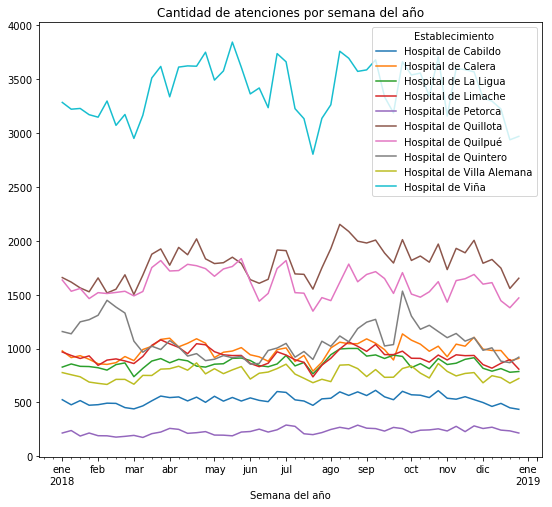

<Figure size 432x288 with 0 Axes>

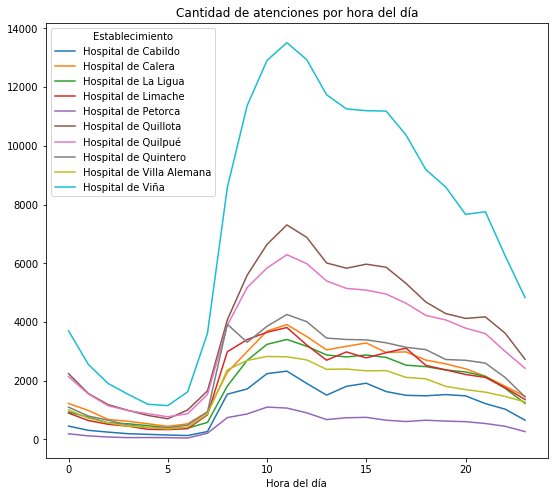

<Figure size 432x288 with 0 Axes>

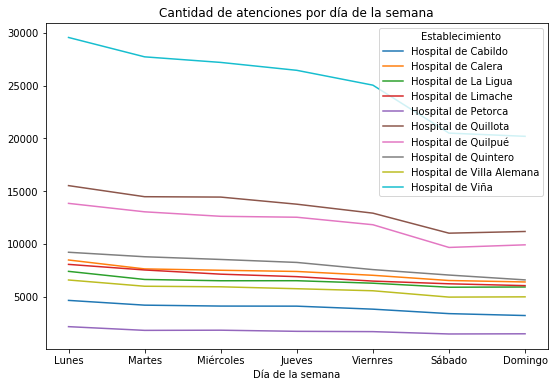

<Figure size 432x288 with 0 Axes>

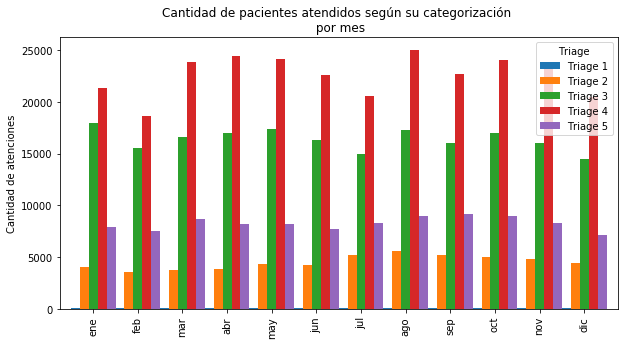

/home/egidio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:270: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement


<Figure size 432x288 with 0 Axes>

In [30]:
ruta             = './resultados/01SS/'
Nombre_archivo   =  '1SS_01PAC_01'

carpeta_script   ='./script_resultados/'
nombre_script    = '01SS_01descripcion_01.py'

archivo_exportar = ruta + Nombre_archivo               
ruta_script      = carpeta_script + nombre_script
ruta_script
exec(open(ruta_script).read())


In [31]:
BD.columns

Index(['Establecimiento', 'RutPaciente', 'Edad', 'Sexo_x', 'Comuna',
       'Provincia', 'MotivoConsulta', 'Prevision', 'Telefono', 'Direccion',
       'Nombre', 'Apellido Paterno', 'Apellido Materno', 'Fecha Nacimiento',
       'Plan', 'Condición de Urgencia', 'ClasificacionConsulta',
       'TipoAccidente', 'NumeroAtencionesAnteriores', 'DiagnosticoPrincipal',
       'OtrosDiagnosticos', 'LlegadaEn', 'ProcedenciaPaciente',
       'Origen_paciente', 'Arribo_paciente', 'LlegadaSAMU', 'Destino_paciente',
       'AtInterrumpidaPor', 'AtendidoPor', 'DestinoAlta', 'CondicionAlCierre',
       'Pronostico', 'Categorizacion', 'AtencionEnfermeria', 'Local',
       'TS_ingreso', 'TS_triage', 'TS_atencion', 'TS_cierremedico',
       'TS_egreso', 'DT_EsperaCategorizacion', 'DT_EsperaMD', 'DT_AtencionMD',
       'DT_definicionPAC', 'DT_Espera_CierreAdm', 'DT_Total', 'Triage',
       'Turno', 'Arribo'],
      dtype='object')

# Descriptor de cada Hospital

In [32]:
BD.columns

Index(['Establecimiento', 'RutPaciente', 'Edad', 'Sexo_x', 'Comuna',
       'Provincia', 'MotivoConsulta', 'Prevision', 'Telefono', 'Direccion',
       'Nombre', 'Apellido Paterno', 'Apellido Materno', 'Fecha Nacimiento',
       'Plan', 'Condición de Urgencia', 'ClasificacionConsulta',
       'TipoAccidente', 'NumeroAtencionesAnteriores', 'DiagnosticoPrincipal',
       'OtrosDiagnosticos', 'LlegadaEn', 'ProcedenciaPaciente',
       'Origen_paciente', 'Arribo_paciente', 'LlegadaSAMU', 'Destino_paciente',
       'AtInterrumpidaPor', 'AtendidoPor', 'DestinoAlta', 'CondicionAlCierre',
       'Pronostico', 'Categorizacion', 'AtencionEnfermeria', 'Local',
       'TS_ingreso', 'TS_triage', 'TS_atencion', 'TS_cierremedico',
       'TS_egreso', 'DT_EsperaCategorizacion', 'DT_EsperaMD', 'DT_AtencionMD',
       'DT_definicionPAC', 'DT_Espera_CierreAdm', 'DT_Total', 'Triage',
       'Turno', 'Arribo'],
      dtype='object')

El siguiente es un script (por ser muy largo lo dejo como archivo a llamar y ejecutar).
El resultado es el 1er parrafo de la descripción de los hospitales que contiene descripción de:
* la cantidad de atenciones
* ditribución de edad (con histograma)
* sexo


In [33]:
ruta             = './resultados/02Hospitales/'
Nombre_archivo   =  '2HOSP_01PAC_01'

carpeta_script   ='./script_resultados/'
nombre_script    = '02Hosp_01descripcion_01.py'

archivo_exportar = ruta + Nombre_archivo               
ruta_script      = carpeta_script + nombre_script
exec(open(ruta_script).read())
#print(open('./script_resultados/02Hosp_01descripcion_01.py').read())

HGF
H_quillota
H_petorca
H_cabildo
H_quintero
H_ligua
H_calera
H_quilpue
H_penablanca
H_limache
-------------------------- 
     ARCHIVOS:  
./resultados/02Hospitales/2HOSP_01PAC_01texto_H_limache.txt
./resultados/02Hospitales/2HOSP_01PAC_01ima_caption_H_limache.caption
Resultado: (por hospital): 
 grafico con histograma de edad 
   analisis del n de consultas con n y %
   metricas de edad y división >y< a 15a
   distribución por sexo


<Figure size 432x288 with 0 Axes>

El siguiente es un script (por ser muy largo lo dejo como archivo a llamar y ejecutar).

El resultado es el 2do parrafo de la descripción de los hospitales que contiene:
* previsión
* comuna
* a que va a atendenderse 

In [34]:
ruta             = './resultados/02Hospitales/'
Nombre_archivo   =  '2HOSP_01PAC_02'

carpeta_script   ='./script_resultados/'
nombre_script    = '02Hosp_01descripcion_02.py'

archivo_exportar = ruta + Nombre_archivo               
ruta_script      = carpeta_script + nombre_script
ruta_script
exec(open(ruta_script).read())
#print(open('./resultados/02Hospitales/2HOSP_01PAC_02tabla01_HGF.tabla').read())


'./script_resultados/02Hosp_01descripcion_02.py'

Ruta:        ./resultados/02Hospitales/
texto_HGF.txt
texto_H_quillota.txt
texto_H_petorca.txt
texto_H_cabildo.txt
texto_H_quintero.txt
texto_H_ligua.txt
texto_H_calera.txt
texto_H_quilpue.txt
texto_H_penablanca.txt
texto_H_limache.txt


el siguiente es un script que

In [35]:
ruta             = './resultados/02Hospitales/'
Nombre_archivo   =  '2HOSP_01PAC_03'

carpeta_script   ='./script_resultados/'
nombre_script    = '02Hosp_01descripcion_03.py'

archivo_exportar = ruta + Nombre_archivo               
ruta_script      = carpeta_script + nombre_script
ruta_script
exec(open(ruta_script).read())




'./script_resultados/02Hosp_01descripcion_03.py'

Ruta:        ./resultados/02Hospitales/
texto_HGF.txt
texto_H_quillota.txt
texto_H_petorca.txt
texto_H_cabildo.txt
texto_H_quintero.txt
texto_H_ligua.txt
texto_H_calera.txt
texto_H_quilpue.txt
texto_H_penablanca.txt
texto_H_limache.txt


In [36]:
hosp_en_curso.CondicionAlCierre.value_counts()[1]
a_redondear

28

NameError: name 'a_redondear' is not defined

In [ ]:
texto           = 'Hubo {} ({}%) pancientes que fallecieron en la unidad de \
emergencias. '.format(
    hosp_en_curso.CondicionAlCierre.value_counts()[1],
    round(hosp_en_curso.CondicionAlCierre.value_counts()[1]/
    hosp_en_curso.CondicionAlCierre.value_counts().sum(),4)
)
texto

In [ ]:
ruta             = './resultados/02Hospitales/'
Nombre_archivo   =  '2HOSP_01PAC_04'

carpeta_script   ='./script_resultados/'
nombre_script    = '02Hosp_01descripcion_04.py'

archivo_exportar = ruta + Nombre_archivo               
ruta_script      = carpeta_script + nombre_script
ruta_script
exec(open(ruta_script).read())
print((open(archivo_exportar + 'texto_HGF.txt').read()))

In [ ]:
dum_segs = BD.copy()
dum_segs[DTs] = dum_segs[DTs].applymap(lambda s: s.total_seconds()/60)

In [ ]:
docs = dum_segs
total ={}
for x in ['Triage 1', 'Triage 2', 'Triage 3', 'Triage 4', 'Triage 5']:
    doc = docs.loc[docs.Triage == x]
    DT_EsperaMD = {}
    for n in range(5,130,5):
        DT_EsperaMD[str(n)] = (doc.DT_EsperaMD>n).value_counts(normalize=True)[0]*100
    print(x)
    total[x] = DT_EsperaMD

#total
cumlimiento = pd.DataFrame.from_dict(total)


In [ ]:
dum = cumlimiento.reset_index()#.set_index('index')
dum['index'] = dum['index'].astype(str).astype(int)
dum = dum.set_index('index')
dum.sort_index().plot(figsize= (8,6))
plt.xlabel('Tiempo en minutos')
plt.ylabel('% pacientes atendidos')
plt.title('Porcentaje de pacientes atendidos antes de \n distintos tiempos')
dum.sort_index()


In [ ]:
todos3 = sidra.groupby(['Triage'])['DT_EsperaMD'].count()
cumplidos3 = sidra[
    ((sidra['DT_EsperaMD'].dt.total_seconds()/60)<31) ].groupby(['Triage'])['DT_EsperaMD'].size()
todos3
cumplidos3

In [ ]:

hosp_en_curso.groupby(
    [hosp_en_curso.TS_ingreso.dt.hour, 'Triage'])['Establecimiento'].count().unstack().plot(
    figsize = (7,5))
plt.title('Cantidad de atenciones por hora en el \n '+ infohospitales[hosp]['Nombre'] +
' según categorizacón' )
plt.xlabel('Hora del día')